# ***Concrete Compressive Strength Prediction***

*Concrete is one of the most important materials in Civil Engineering. Knowing the compressive strength of concrete is very important when constructing a building or a bridge. Compressive Strength of Concrete is a highly non-linear function of ingredients used in making it and their characteristics. Thus, using Machine Learning to predict the Strength could be useful in generating a combination of ingredients which result in high Strength.*

>*This notebook demonstrates the use of Machine Learning algorithm **Linear Regression** to predict Concrete Compressive Strength.*

In [1]:
#Importing Python Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the DataSet

In [2]:
df = pd.read_excel('Concrete_Data.xls')

In [3]:
df.head()

,Cement (kg in a m^3 mixture),Blast Furnace Slag (kg in a m^3 mixture),Fly Ash (kg in a m^3 mixture),Water (kg in a m^3 mixture),Superplasticizer (kg in a m^3 mixture),Coarse Aggregate (kg in a m^3 mixture),Fine Aggregate (kg in a m^3 mixture),Age (day),"Concrete compressive strength (MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
#Changing the column names for future convinience while writting them in codes.

df.columns=['Cement', 'Blast Furnace Slag', 'Fly Ash',
       'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength']

df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
465,173.81,93.37,159.9,172.34,9.73,1007.2,746.6,100,50.938487
101,388.60,97.10,0.0,157.90,12.10,852.1,925.7,7,34.901275
472,446.00,24.00,79.0,162.00,11.64,967.0,712.0,28,44.422939
549,333.00,0.00,0.0,192.00,0.00,931.2,842.6,90,41.680203
56,475.00,0.00,0.0,228.00,0.00,932.0,594.0,365,41.934620


## Understanding the Data

In [5]:
df.shape

(1030, 9)

>*There are 1030 rows and 9 columns in the dataset.*

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


#### **Checking for NULL values**

In [8]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

>*There are no NULL values in the data*

### **Exploratory Data Analysis**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete compressive strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


#### **Checking for duplicacy in dataset**

In [10]:
df.duplicated().sum()

25

>*There are 25 duplicated rows in the datset.*

##### Removing Duplicate Rows to make dataset more streamlined

In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.shape

(1005, 9)

>1005 rows are left after removing duplicates.

#### **MultiVariate Analysis**

In [13]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.000000,-0.303301,-0.385618,-0.056583,0.061296,-0.086212,-0.245379,0.086349,0.488283
Blast Furnace Slag,-0.303301,1.000000,-0.312342,0.130295,0.019902,-0.277558,-0.289676,-0.042759,0.103370
Fly Ash,-0.385618,-0.312342,1.000000,-0.283372,0.414055,-0.026485,0.090229,-0.158940,-0.080648
Water,-0.056583,0.130295,-0.283372,1.000000,-0.646875,-0.212495,-0.444888,0.279269,-0.269606
Superplasticizer,0.061296,0.019902,0.414055,-0.646875,1.000000,-0.242031,0.207794,-0.194094,0.344225
Coarse Aggregate,-0.086212,-0.277558,-0.026485,-0.212495,-0.242031,1.000000,-0.162212,-0.005263,-0.144710
Fine Aggregate,-0.245379,-0.289676,0.090229,-0.444888,0.207794,-0.162212,1.000000,-0.156572,-0.186457
Age,0.086349,-0.042759,-0.158940,0.279269,-0.194094,-0.005263,-0.156572,1.000000,0.337371
Concrete compressive strength,0.488283,0.103370,-0.080648,-0.269606,0.344225,-0.144710,-0.186457,0.337371,1.000000


>No significant correlation between columns.

>There are not any high correlations between Compressive Strength and other features except for Cement, which is obvious for more strength.

>Age and Superplasticizer are the other two features which are strongly correlated with Compressive Strength.

>Superplasticizer seems to have a negative high correlation with Water, positive correlations with Fly ash and Fine aggregate.

#### **Plotting BoxPlots (For detecting Outliers)**

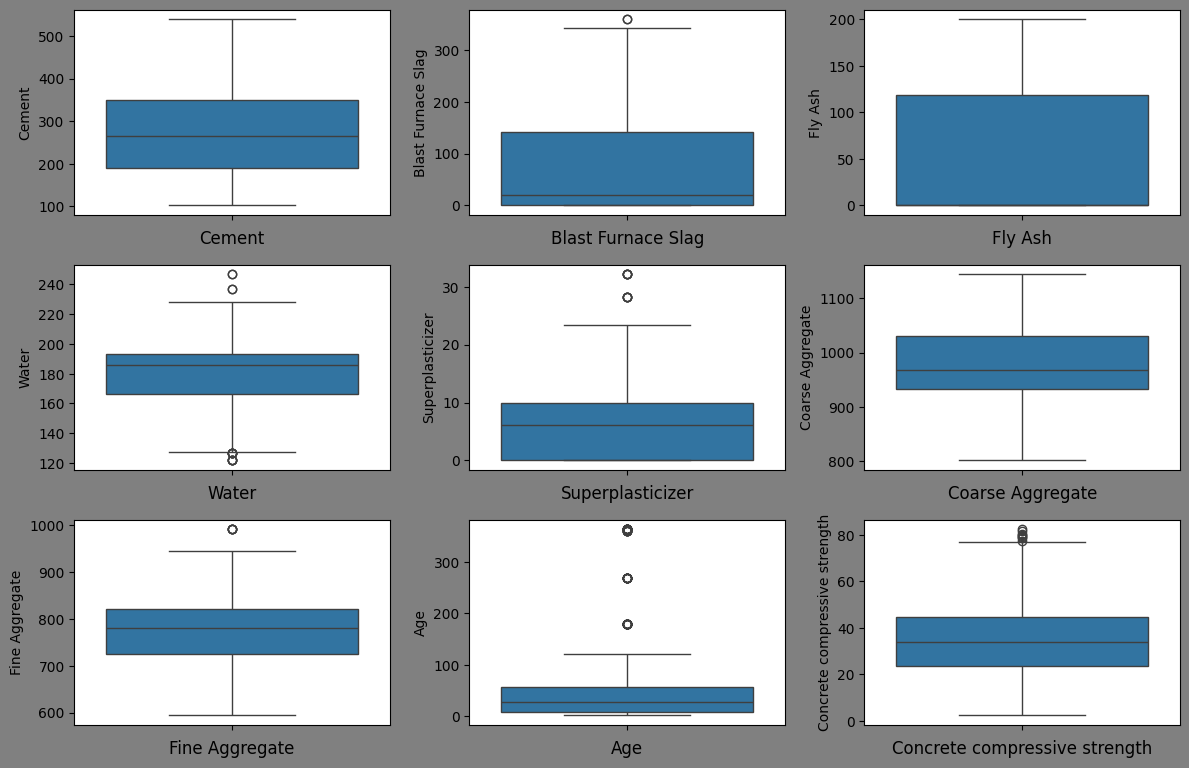

In [14]:
plt.figure(figsize = (12,10), facecolor = 'grey')
plot_no = 1
for i in df.columns:
    ax = plt.subplot(4,3, plot_no)
    sns.boxplot(df[i])
    plt.xlabel(i, fontsize=12)
    plot_no +=1
plt.tight_layout()
plt.show()

>There are Outliers in Water, Superplasticizer, Age, Fine Aggregate, Blast Furnace Slag

In [15]:
# For ignoring Warnings while running Python codes.

import warnings 
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)

### Handling Outliers
Here, we used Inter-quartile Range based Capping method for tackling outliers.

In [16]:
outliers_col=['Water','Superplasticizer','Age','Fine Aggregate','Blast Furnace Slag']

#For doing IQR based filtering
def outlier_capping(dataframe: pd.DataFrame, outliers:list):
    capped_df = dataframe.copy()
    for i in outliers:
        q1 = capped_df[i].quantile(0.25)
        q3 = capped_df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 *iqr
        lower_limit = q3 - 1.5 *iqr
        capped_df.loc[capped_df[i] >upper_limit, i] = upper_limit
        capped_df.loc[capped_df[i] <lower_limit, i] = lower_limit
    return capped_df
df = outlier_capping(dataframe = df, outliers=outliers_col)

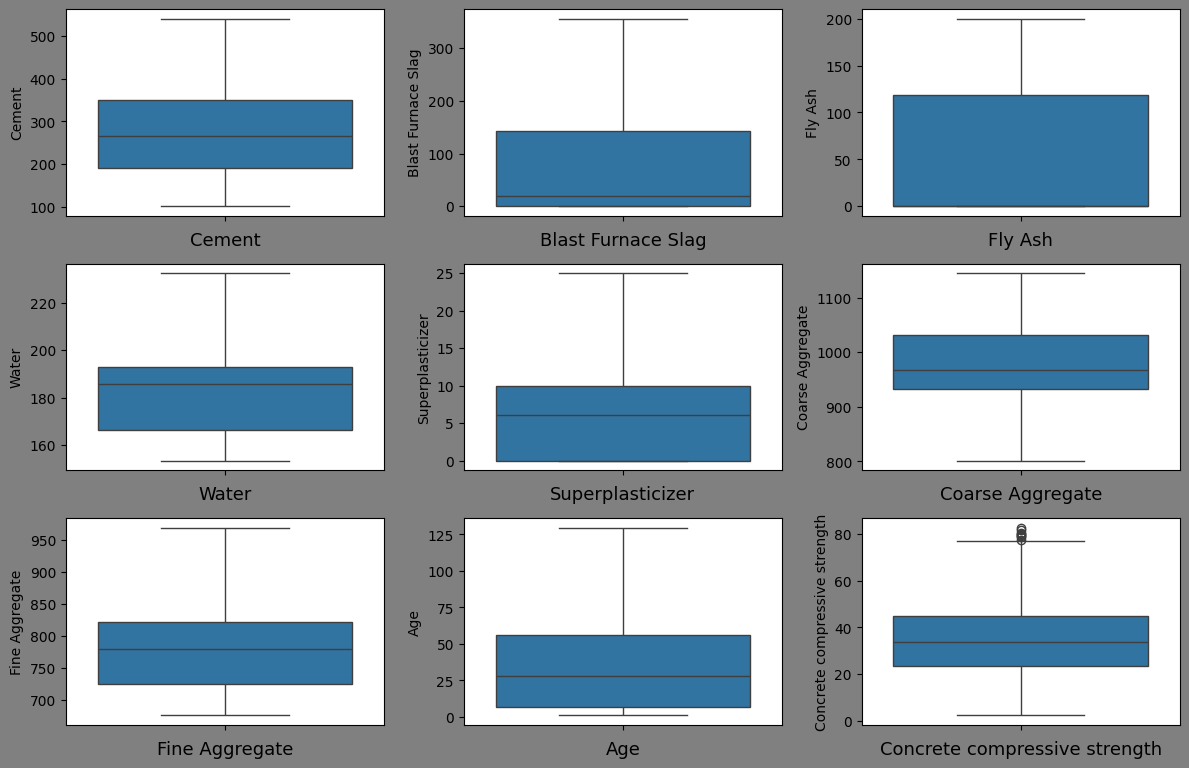

In [17]:
plt.figure(figsize = (12,10), facecolor = 'grey')
plot_no = 1
for i in df.columns:
    ax = plt.subplot(4,3, plot_no)
    sns.boxplot(df[i])
    plt.xlabel(i, fontsize = 13)
    plot_no +=1
plt.tight_layout()
plt.show()

### ***Linearity***

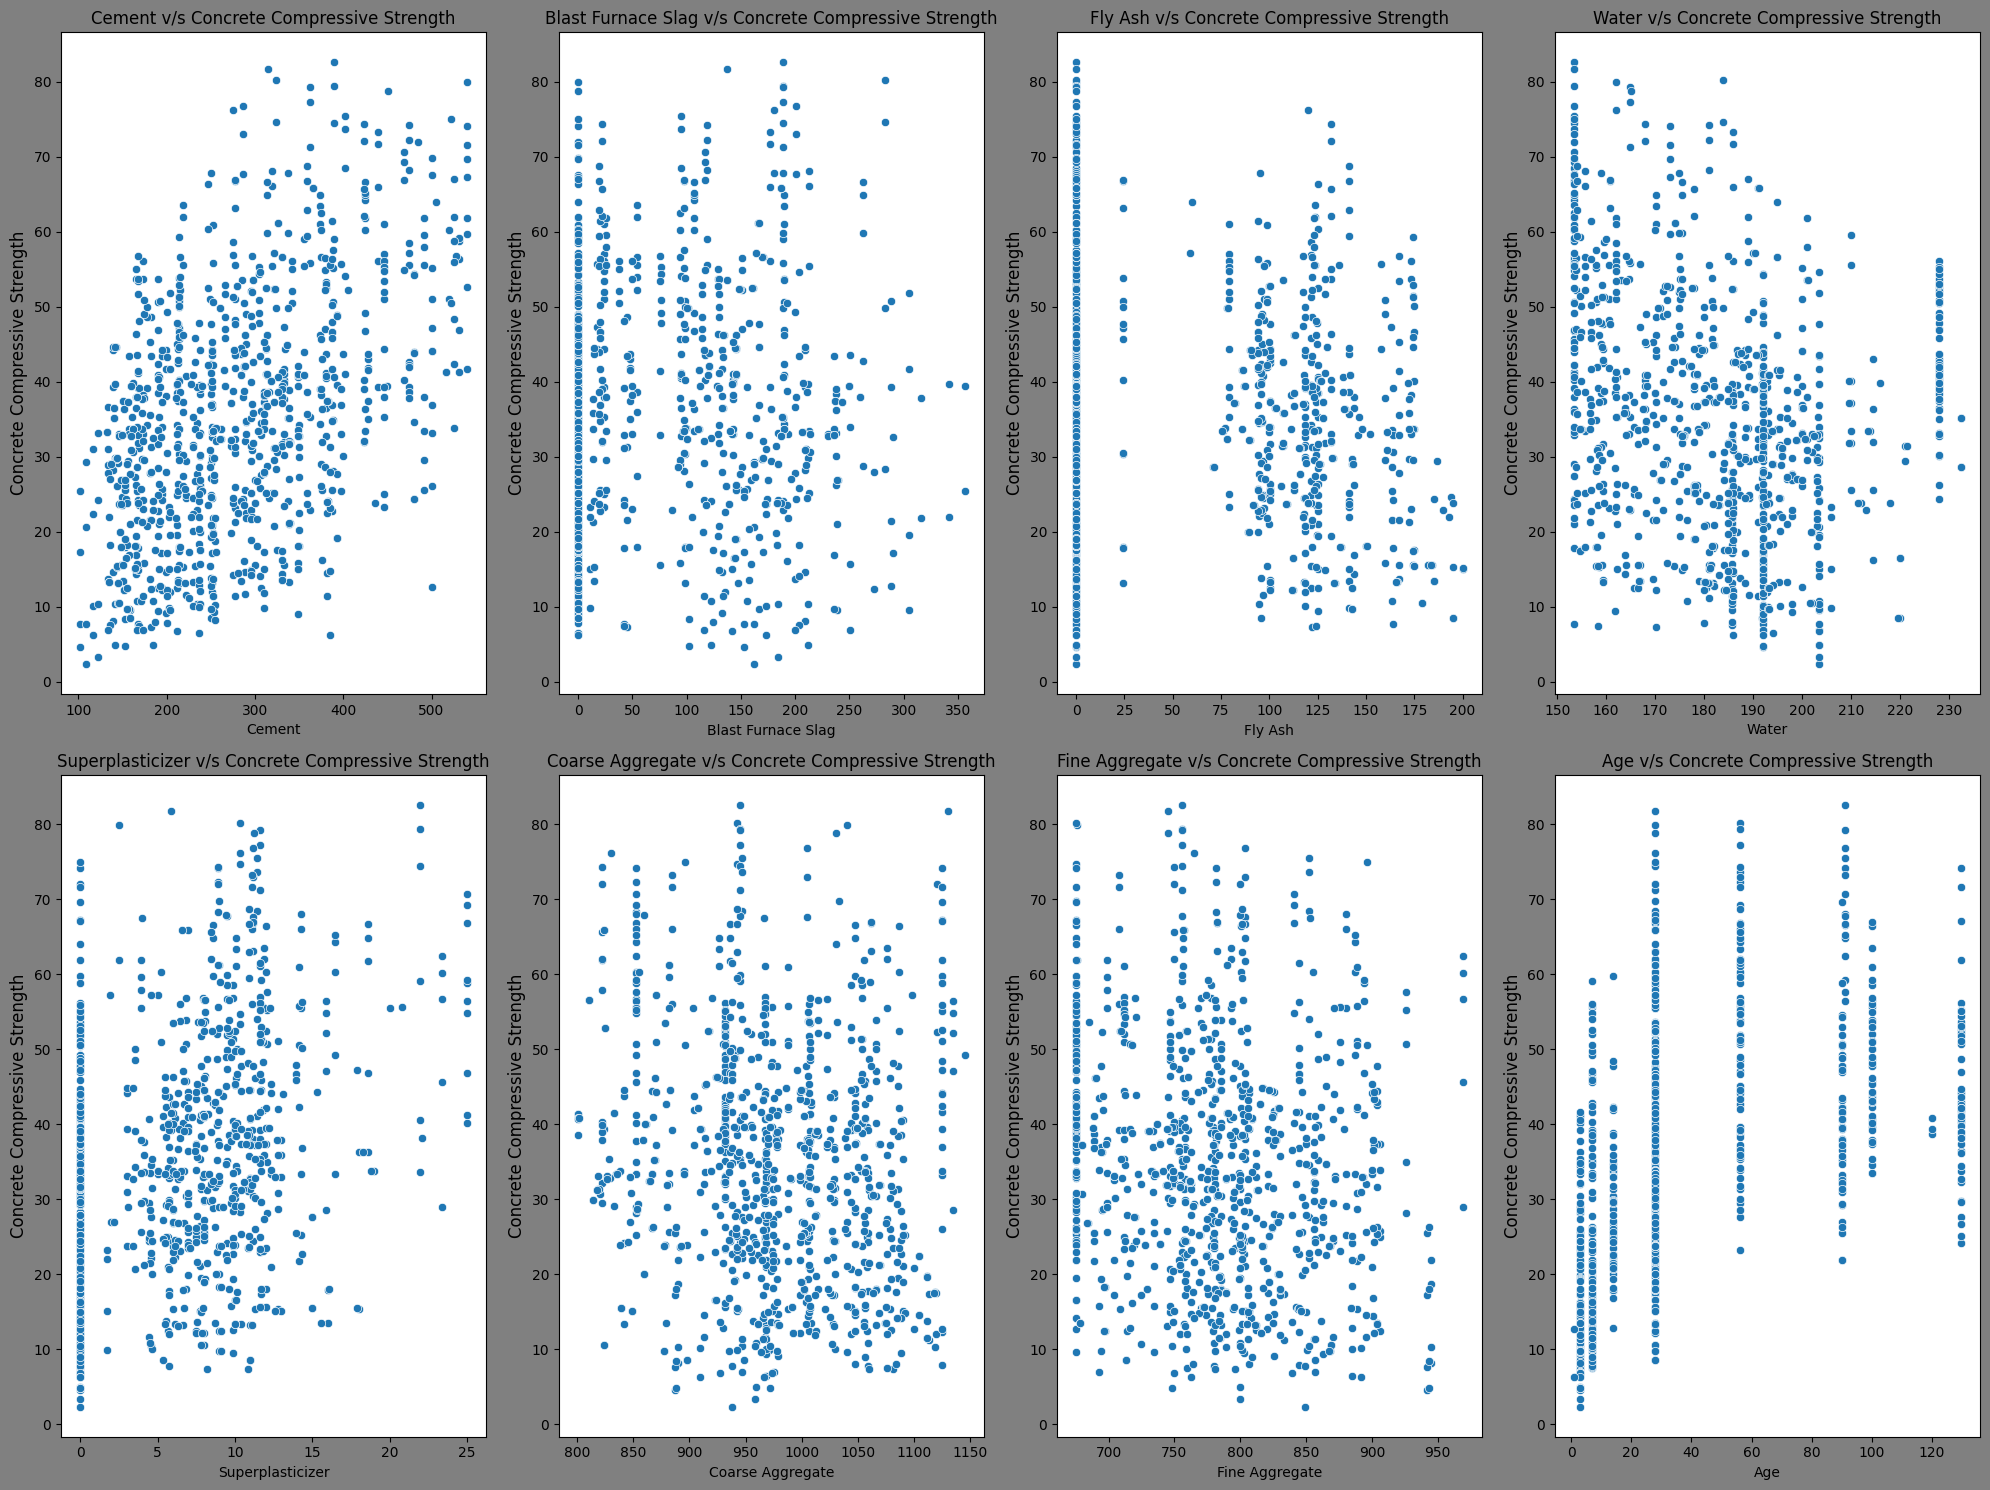

In [18]:
plt.figure(figsize=(20, 15),facecolor = 'grey')  # To vary the figure size
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)  # For adjusting the subplot layout as needed
    sns.scatterplot(data=df, x=col, y='Concrete compressive strength')
    plt.title(f'{col} v/s Concrete Compressive Strength')
    plt.xlabel(col,fontsize=10)
    plt.ylabel('Concrete Compressive Strength',fontsize=12)
plt.tight_layout()
plt.show()

**Observations(Few trends followed in data which are almost Linear):-**
>Compressive Strength increases strongly with amount of Cement.

>Compressive Strength increases with Age.

>Concrete Strength increases when less water is used in preparing it.

>As Flyash increases the Strength decreases.

>Strength increases with Superplasticizer

***Although, we are making conclusions by observing the scatter plots, there is an underlying non-linear interaction between features which we cannot visualize :(***

### ***Normality***

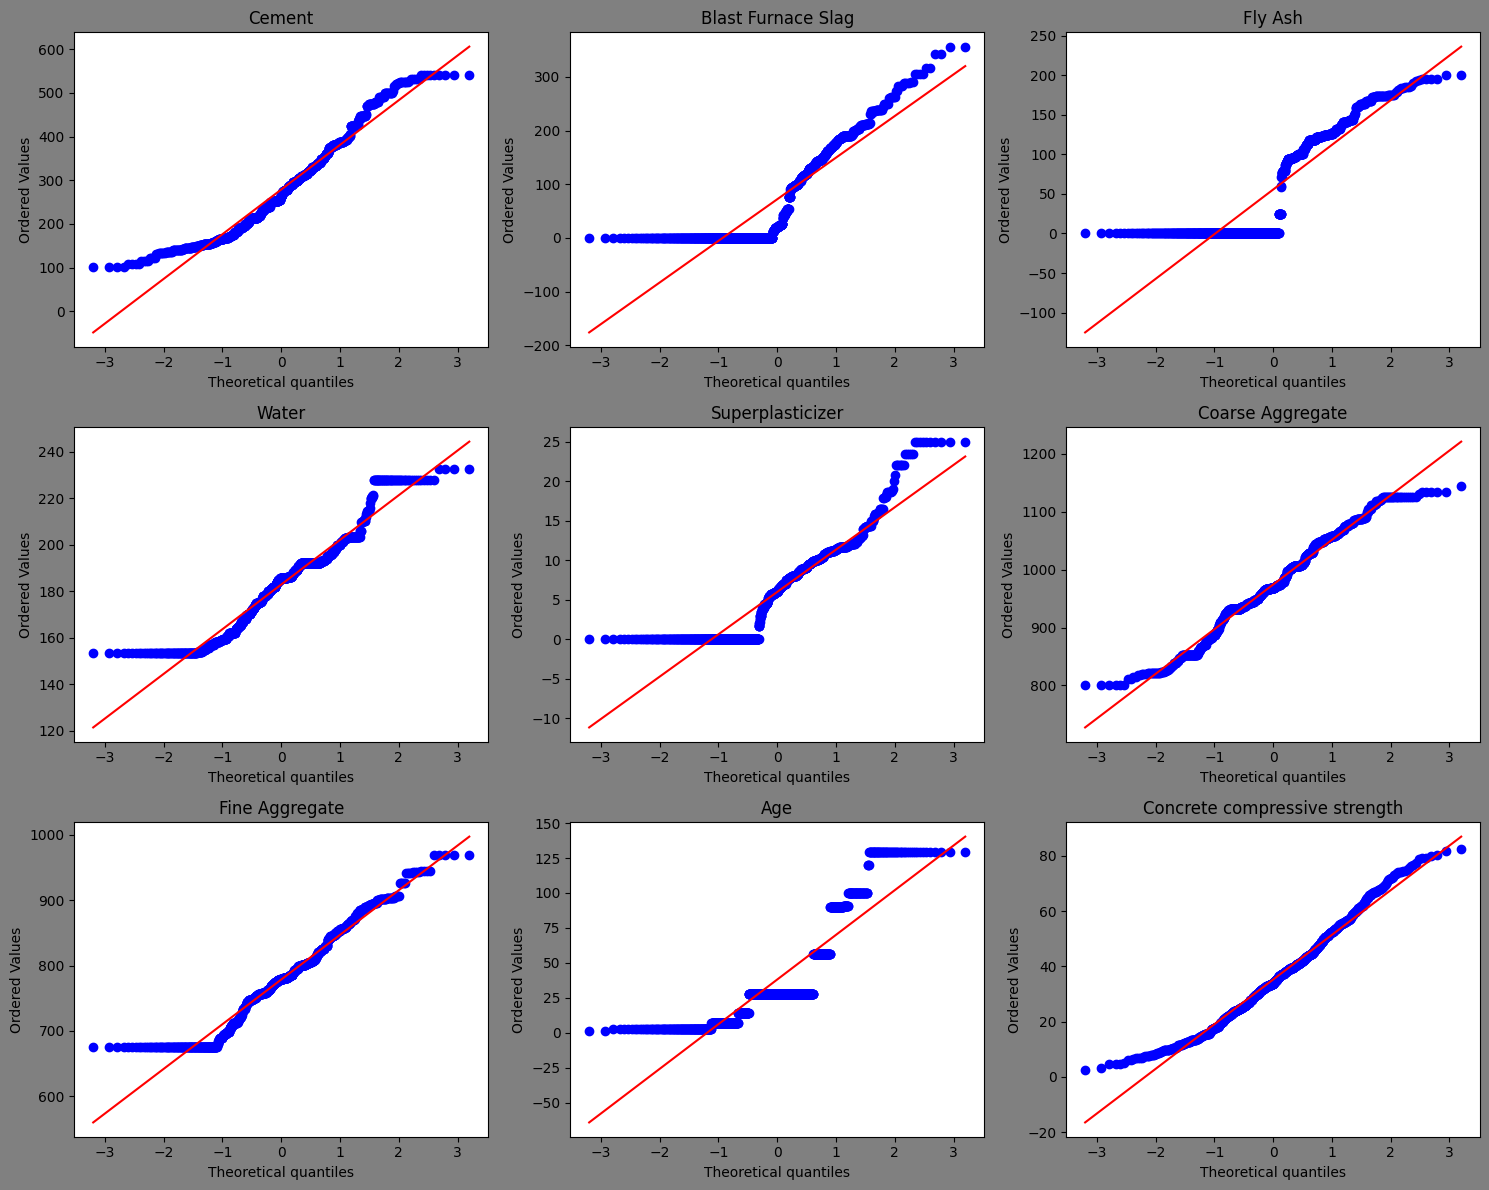

In [19]:
import scipy.stats as sp

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12),facecolor = 'grey')

# Flattening the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plotting the Q-Q plots
for i in range(9):
    sp.probplot(df.iloc[:,i], dist="norm", plot=axes[i])
    axes[i].set_title(f'{df.columns[i]}',fontsize=12)

# To adjust layout
plt.tight_layout()
plt.show()

In [20]:
for i in df.columns[0:-1]:
    skewness = round(df[i].skew(), 2)
    kurtosis = round(df[i].kurtosis(), 2)
    print(f'{i:<20}:- Skewness = {skewness:<10}  Kurtosis = {kurtosis}')

Cement              :- Skewness = 0.56        Kurtosis = -0.43
Blast Furnace Slag  :- Skewness = 0.85        Kurtosis = -0.42
Fly Ash             :- Skewness = 0.5         Kurtosis = -1.37
Water               :- Skewness = 0.37        Kurtosis = -0.23
Superplasticizer    :- Skewness = 0.71        Kurtosis = 0.29
Coarse Aggregate    :- Skewness = -0.07       Kurtosis = -0.58
Fine Aggregate      :- Skewness = 0.24        Kurtosis = -0.56
Age                 :- Skewness = 1.28        Kurtosis = 0.56


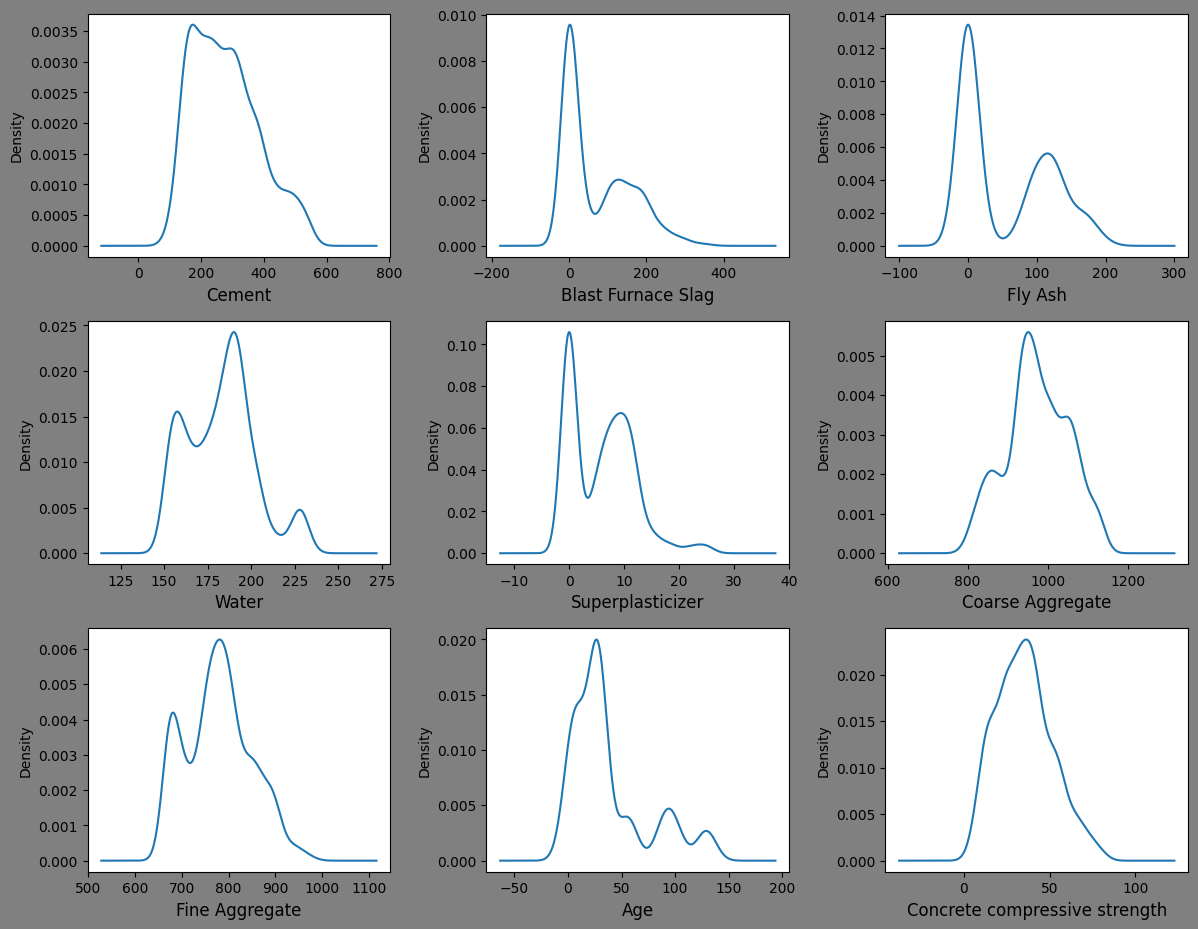

In [21]:
plt.figure(figsize = (12,12), facecolor = 'grey')
plot_no = 1
for i in df.columns:
    ax = plt.subplot(4,3, plot_no)
    df[i].plot(kind='kde')
    plt.xlabel(i, fontsize = 12)
    plot_no +=1
plt.tight_layout()
plt.show()

### **Box-Cox Transform (For Normalizing the Data)**

In [22]:
df_trf = df.copy()
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
df_transformed = pd.DataFrame(pt.fit_transform(df_trf+0.0000001),columns=df_trf.columns)

In [23]:
for i in df_transformed.columns[0:-1]:
    skewness = round(df_transformed[i].skew(), 2)
    kurtosis = round(df_transformed[i].kurtosis(), 2)
    print(f'{i:<20}:- Skewness = {skewness:<10}  Kurtosis = {kurtosis}')

Cement              :- Skewness = -0.01       Kurtosis = -0.85
Blast Furnace Slag  :- Skewness = -0.13       Kurtosis = -1.97
Fly Ash             :- Skewness = 0.15        Kurtosis = -1.98
Water               :- Skewness = 0.01        Kurtosis = -0.64
Superplasticizer    :- Skewness = -0.49       Kurtosis = -1.74
Coarse Aggregate    :- Skewness = -0.02       Kurtosis = -0.59
Fine Aggregate      :- Skewness = 0.01        Kurtosis = -0.74
Age                 :- Skewness = -0.06       Kurtosis = -0.74


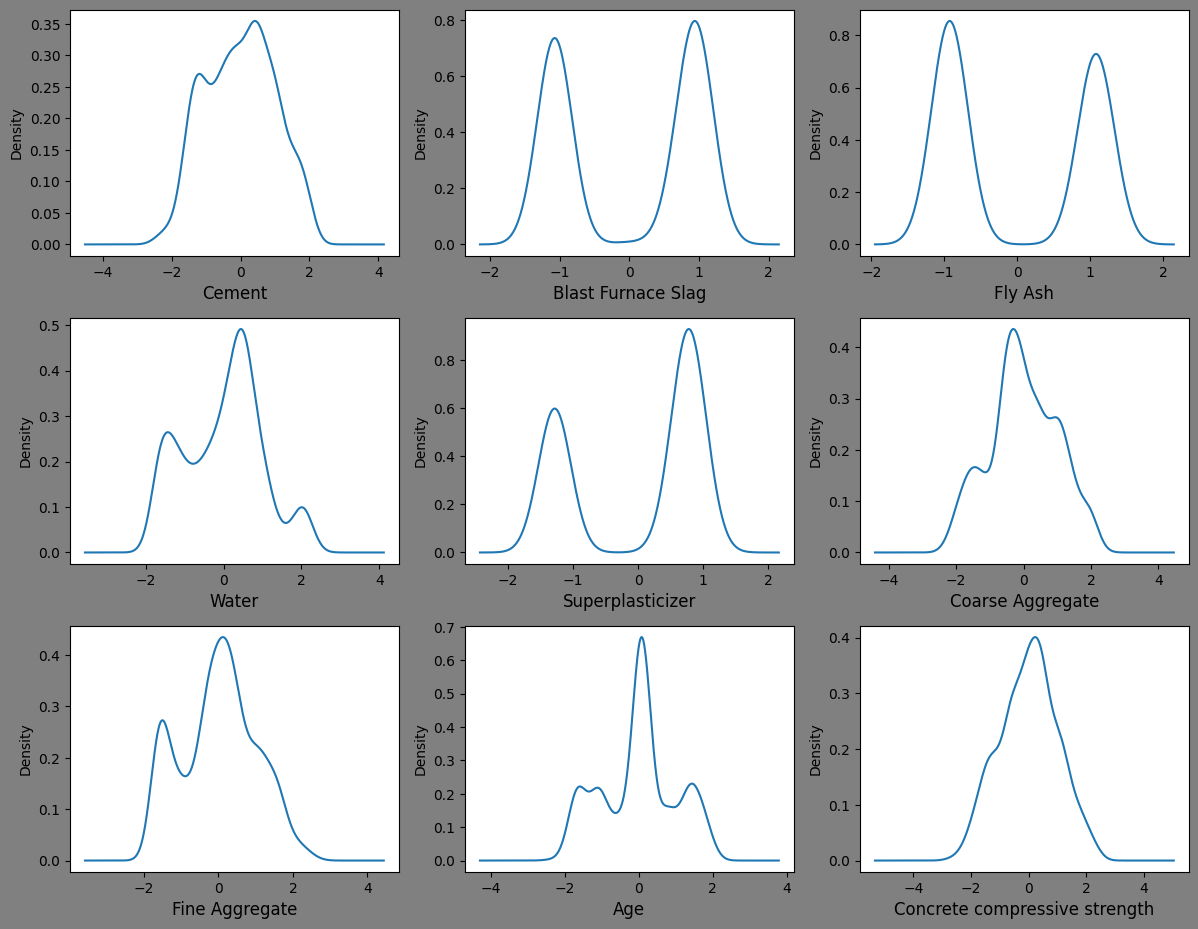

In [24]:
plt.figure(figsize = (12,12), facecolor = 'grey')
plot_no = 1
for i in df_transformed.columns:
    ax = plt.subplot(4,3, plot_no)
    df_transformed[i].plot(kind='kde')
    plt.xlabel(i, fontsize = 12)
    plot_no +=1
plt.tight_layout()
plt.show()

#### **Separating Input Features and Target Variable.**

In [25]:
X = df_transformed.iloc[:,:-1]
Y = df_transformed.iloc[:,-1]

### Separating Training and Test data

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [27]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.990096,-1.072971,-0.925941,-1.093123,0.514090,0.844098,-1.569145,0.083382
1,1.990096,-1.072971,-0.925941,-1.093123,0.514090,1.041513,-1.569145,0.083382
2,0.638861,0.964643,-0.925941,2.035278,-1.284201,-0.554521,-1.580493,1.770903
3,0.638861,0.964643,-0.925941,2.035278,-1.284201,-0.554521,-1.580493,1.770903
4,-0.715837,0.956051,-0.925941,0.530600,-1.284201,0.041375,0.711276,1.770903


In [28]:
Y.head()

0    2.328177
1    1.510172
2    0.391119
3    0.435394
4    0.615203
Name: Concrete compressive strength, dtype: float64

# ***Multiple Linear Regression (by Least Square Method)***

> ### *Making our own Linear Regression Class*

In [29]:
class MyLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,Y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        #Calculating the coefficients 
        Theetas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(Y_train)
        self.intercept_ = Theetas[0]                          # 0o
        self.coef_ = Theetas[1:]                              # 01,02,03,...

    def predict(self,X_test):
        Y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return Y_pred

### ***Fitting Model on Training data***

In [30]:
lr = MyLR()
lr.fit(X_train,Y_train)
Y_Pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE is-",mean_absolute_error(Y_test,Y_Pred)) 
print("MSE is-",mean_squared_error(Y_test,Y_Pred))
print("RMSE is-",np.sqrt(mean_squared_error(Y_test,Y_Pred)))

MAE is- 0.32230485402904163
MSE is- 0.1674330489448517
RMSE is- 0.40918583668652525


In [32]:
print("R2 score is--",r2_score(Y_test,Y_Pred))

R2 score is-- 0.8335323791121112


***i.e. R2 Score of Linear Regression model by Least Squares method is 0.8335***

In [33]:
#Adjusted R2 Score
r2 = r2_score(Y_test,Y_Pred)
n = X_test.shape[0]          # No.of rows in the test data
k = 8                        # No. of independent features

r2_adj = 1 - ((1-r2)*(n-1)/(n-1-k))

print("Adjusted R2 Score is--",r2_adj)      

Adjusted R2 Score is-- 0.8265962282417825


In [34]:
lr.intercept_

0.001141635819533626

In [35]:
lr.coef_

array([ 0.47068896,  0.22820705, -0.02870399, -0.33073381,  0.1661239 ,
       -0.06780018, -0.16851135,  0.62934637])

**Note:-** Please note that the above coefficents(θ1,θ2,θ3,...) and intercept(θo) are the ones obtained after transforming the data values by Box-Cox transform. 

# ***Using Gradient Descent algorithm***

> ### *Making our own **Batch** Gradient Descent Class*

In [36]:
class BGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,Y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # To update all the coefficents and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            intercept_der = -2 * np.mean(Y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((Y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

### ***Fitting Gradient Descent based model on Training data***

In [37]:
gd = BGDRegressor(epochs=1000,learning_rate=0.05)

In [38]:
gd.fit(X_train,Y_train)

0.0011416929054764182 [ 0.47069277  0.22821107 -0.02870315 -0.33072733  0.16612759 -0.06779518
 -0.16850629  0.62934615]


In [39]:
y_pred = gd.predict(X_test)

In [40]:
print("MAE is-",mean_absolute_error(Y_test,y_pred)) 
print("MSE is-",mean_squared_error(Y_test,y_pred))
print("RMSE is-",np.sqrt(mean_squared_error(Y_test,y_pred)))

MAE is- 0.32230521732177825
MSE is- 0.16743320444470547
RMSE is- 0.4091860266977667


In [41]:
print("R2 score is--",r2_score(Y_test,y_pred))      

R2 score is-- 0.8335322245088781


***i.e. R2 Score of Linear Regression model using Batch Gradient Descent is 0.8335***

In [42]:
#Adjusted R2 Score
r2 = r2_score(Y_test,y_pred)
n = X_test.shape[0]          # No.of rows in the test data
k = 8                        # No. of independent features

r2_adj = 1 - ((1-r2)*(n-1)/(n-1-k))

print("Adjusted R2 Score is--",r2_adj)

Adjusted R2 Score is-- 0.826596067196748


> ### *Performing **Stochastic** Gradient Descent using Scikit-Learn library*

In [43]:
from sklearn.linear_model import SGDRegressor

In [44]:
sgd = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [45]:
sgd.fit(X_train,Y_train)

SGDRegressor(learning_rate='constant', max_iter=100)

In [46]:
Y_prediction = sgd.predict(X_test)

In [47]:
print("MAE is-",mean_absolute_error(Y_test,Y_prediction)) 
print("MSE is-",mean_squared_error(Y_test,Y_prediction))
print("RMSE is-",np.sqrt(mean_squared_error(Y_test,Y_prediction)))

MAE is- 0.3351662909980152
MSE is- 0.17470088913595042
RMSE is- 0.4179723545115758


In [48]:
print("R2 score is--",r2_score(Y_test,Y_prediction)) 

R2 score is-- 0.826306445682421


***i.e. R2 Score of Linear Regression model using Stochastic Gradient Descent is 0.8281***

>***If we use IQR based TRIMMING method while handling outliers, then the accuracy of the model gets increased to more than 85%. But, in this way, we trim out rows having outliers. So, 86 rows having outliers will be removed and we will be left with 919 rows only which doesn't seems good. So, we used CAPPING method to tackle outliers such that we didn't lose any useful insight from dataset.***

# **Assumptions of LINEAR REGRESSION**

>*We have already checked for assumptions like **Linearity, Normality** above...*

### ***Mean of Residuals***

*It is the difference between the actual value and the predicted value. We have assumed Mean of Residuals to be zero. Let's check this assumption.*

In [49]:
residuals1 = Y_test.values - Y_Pred
residuals2 = Y_test.values - y_pred
residuals3 = Y_test.values - Y_prediction
mean_res1 = np.mean(residuals1)
mean_res2 = np.mean(residuals2)
mean_res3 = np.mean(residuals3)
print("Mean of Residuals using Least Squares method is: ",mean_res1)
print("Mean of Residuals using Batch Gradient Descent is: ",mean_res2)
print("Mean of Residuals using Stochastic Gradient Descent is: ",mean_res3)

Mean of Residuals using Least Squares method is:  -0.005708179097740047
Mean of Residuals using Batch Gradient Descent is:  -0.005708436747799642
Mean of Residuals using Stochastic Gradient Descent is:  -0.020142048084082136


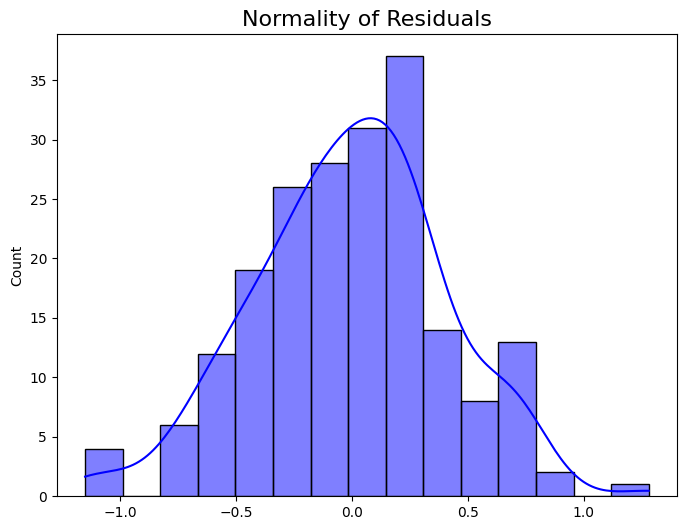

In [50]:
plt.figure(figsize=(8,6))
sns.histplot(residuals2, kde = True, color = 'b')
plt.title('Normality of Residuals',fontsize=16)
plt.show()

### ***Homoscedasticity***
*The residuals are assumed to have equal variance (homoscedasticity) for every value of the fitted values and of the predictors.*

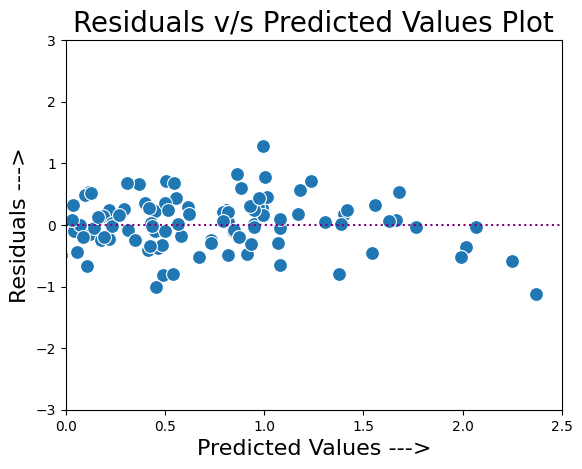

In [51]:
#Residual Plot of Error (ε) versus Y predicted (Ŷ)

p = sns.scatterplot(x=y_pred, y=residuals2,s=100)
plt.xlabel('Predicted Values --->',fontsize=16)
plt.ylabel('Residuals --->',fontsize=16)
plt.ylim(-3, 3)
plt.xlim(0, 2.5)

p = plt.axhline(y=0, color='purple', linestyle=':')

p = plt.title('Residuals v/s Predicted Values Plot',fontsize=20)
plt.show()

### ***Multicollinearity***
*Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other, i.e. Multicollinearity indicates a strong linear relationship among the predictor variables. Linear Regression assumes little to no multicollinearity among input variables. Let us check this assumption by looking at the correlation matrix.*

In [52]:
df_transformed.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.000000,-0.228754,-0.320025,-0.059373,-0.102328,-0.066112,-0.194827,0.004494,0.478211
Blast Furnace Slag,-0.228754,1.000000,-0.111871,0.019063,0.135338,-0.354542,-0.262132,-0.015369,0.191269
Fly Ash,-0.320025,-0.111871,1.000000,-0.321635,0.682612,-0.024596,0.109152,-0.010977,-0.015458
Water,-0.059373,0.019063,-0.321635,1.000000,-0.570102,-0.217136,-0.410926,0.134708,-0.271759
Superplasticizer,-0.102328,0.135338,0.682612,-0.570102,1.000000,-0.199444,0.140881,-0.023302,0.291438
Coarse Aggregate,-0.066112,-0.354542,-0.024596,-0.217136,-0.199444,1.000000,-0.142899,-0.034447,-0.145354
Fine Aggregate,-0.194827,-0.262132,0.109152,-0.410926,0.140881,-0.142899,1.000000,-0.077540,-0.195805
Age,0.004494,-0.015369,-0.010977,0.134708,-0.023302,-0.034447,-0.077540,1.000000,0.595246
Concrete compressive strength,0.478211,0.191269,-0.015458,-0.271759,0.291438,-0.145354,-0.195805,0.595246,1.000000


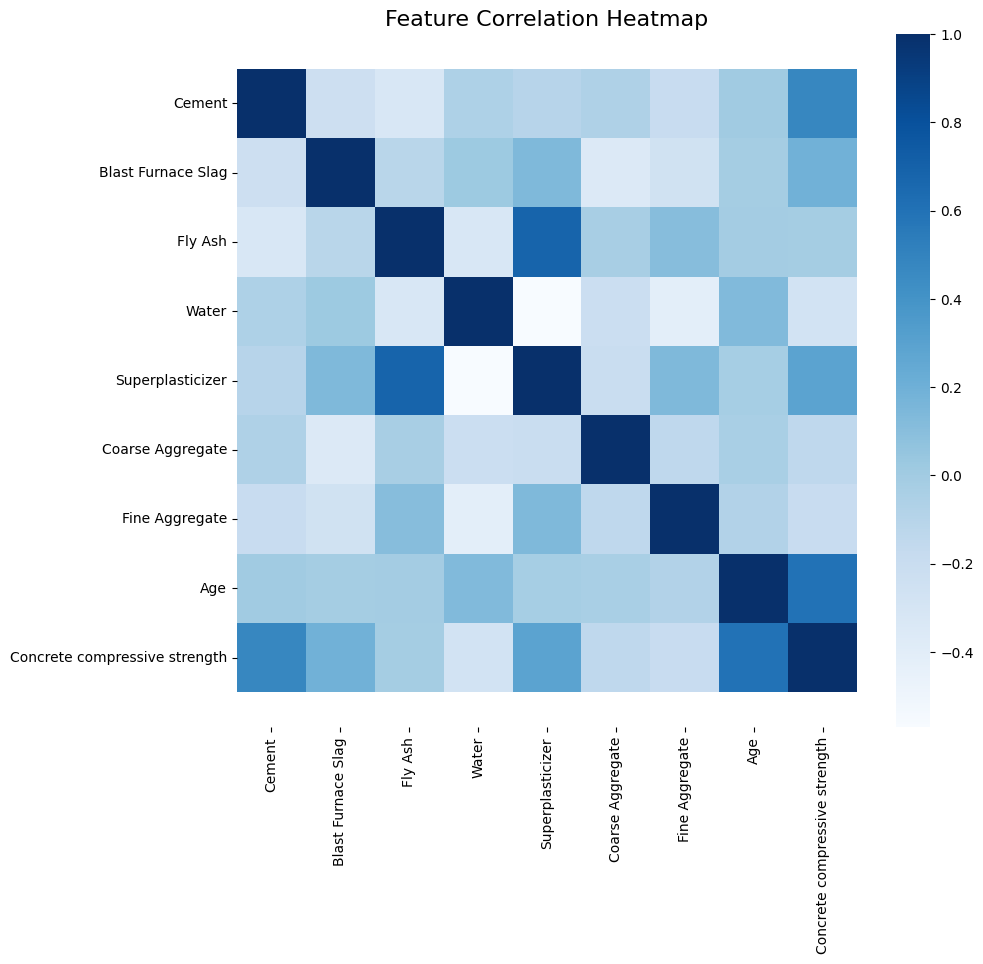

In [53]:
corr = df_transformed.corr()
plt.figure(figsize=(10, 9)) 
sns.heatmap(corr, cmap='Blues') 
b, t = plt.ylim();  # Corrected line with a semicolon
plt.ylim(b + 0.5, t - 0.5) 
plt.title("Feature Correlation Heatmap",fontsize=16) 
plt.show()

*One more method to detect multicollinearity is to calculate the variance inflation factor (VIF) for each independent variable, and a **VIF value greater than 4 indicates a serious problem.***

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df_transformed[['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']]

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculating VIF for each independent feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_data)

              feature       VIF
0              Cement  1.977038
1  Blast Furnace Slag  2.201318
2             Fly Ash  2.640957
3               Water  3.368320
4    Superplasticizer  3.471774
5    Coarse Aggregate  2.356877
6      Fine Aggregate  2.429953
7                 Age  1.024980


**Since, each VIF value is less than 4, there is no serious problem among the independent input features.**